In [2]:
import numpy as np
import visualkeras as vk 
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [3]:
train_data = np.load("../numpy/train_data.npy")
test_data = np.load("../numpy/test_data.npy")
train_labels = np.load("../numpy/train_labels.npy")
test_labels = np.load("../numpy/test_labels.npy")

In [4]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

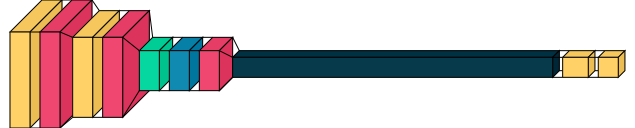

In [5]:
vk.layered_view(model)

In [7]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="../models/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [8]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 569s 319ms/step - loss: 0.1546 - accuracy: 0.9553 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 2/10
1770/1770 [==============================] - 513s 290ms/step - loss: 0.0688 - accuracy: 0.9795 - val_loss: 0.0657 - val_accuracy: 0.9809
Epoch 3/10
1770/1770 [==============================] - 488s 276ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0544 - val_accuracy: 0.9849
Epoch 4/10
1770/1770 [==============================] - 485s 274ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0569 - val_accuracy: 0.9842
Epoch 5/10
1770/1770 [==============================] - 487s 275ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0489 - val_accuracy: 0.9868
Epoch 6/10
1770/1770 [==============================] - 603s 341ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0495 - val_accuracy: 0.9865
Epoch 7/10
1770/1770 [==============================] - 578s 327ms/step - loss: 0.0228 - accuracy: 0.9923 - val_

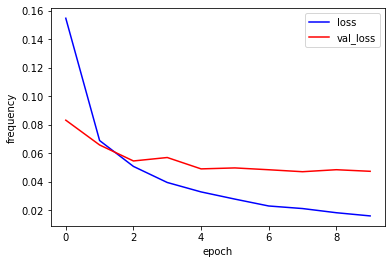

In [9]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

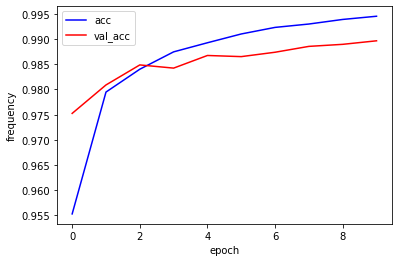

In [11]:
plt.plot(history.history["accuracy"], 'b', label="acc")
plt.plot(history.history["val_accuracy"], 'r', label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [12]:
model.load_weights("../models/best_val_loss_model.h5")

In [13]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

2766/2766 [==============================] - 25s 9ms/step - loss: 0.0469 - accuracy: 0.9886
0.04689090698957443 0.9885636568069458


In [14]:
predictions = model.predict(test_data)

In [15]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2713    0    0 ...    0    0    0]
 [   3 1681    0 ...    0    4    0]
 [   0    0 4631 ...    0    0    0]
 ...
 [   0    0    0 ... 1465    1    5]
 [   0    1    0 ...    0 1330    2]
 [   0    0    0 ...    4    7 1409]]


<AxesSubplot:xlabel='predicted', ylabel='actual'>

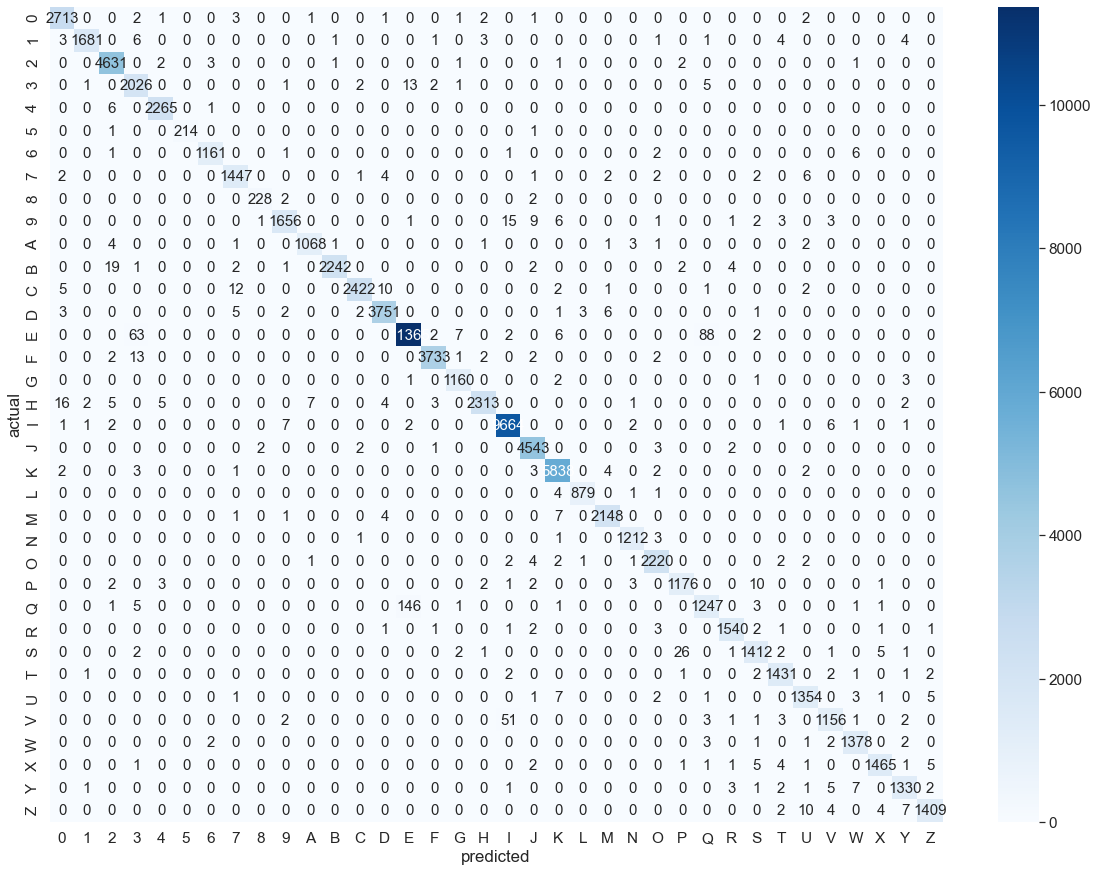

In [16]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")